# Clusterização da base de whisky

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [36]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [37]:
#Importando base em CSV e fazendo algumas transformações
whisky = pd.read_csv('whisky.csv')

whisky = whisky.drop(['RowID'], axis = 1)

In [38]:
whisky.columns

Index(['Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral',
       'Postcode', 'Latitude', 'Longitude'],
      dtype='object')

In [39]:
whisky = whisky[['Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral',
       'Postcode', 'Latitude', 'Longitude']]

In [40]:
whisky

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140
5,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950
6,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610
7,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623
8,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623
9,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770


Analisando a base

In [41]:
whisky['Body'].value_counts()

2    45
1    19
3    11
4     9
0     2
Name: Body, dtype: int64

In [42]:
#Quantidade de linas e colunas
whisky.shape

(86, 16)

In [43]:
#Descrição estatística da base
whisky.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


In [44]:
#Colhendo informações das variáveis
whisky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Distillery  86 non-null     object
 1   Body        86 non-null     int64 
 2   Sweetness   86 non-null     int64 
 3   Smoky       86 non-null     int64 
 4   Medicinal   86 non-null     int64 
 5   Tobacco     86 non-null     int64 
 6   Honey       86 non-null     int64 
 7   Spicy       86 non-null     int64 
 8   Winey       86 non-null     int64 
 9   Nutty       86 non-null     int64 
 10  Malty       86 non-null     int64 
 11  Fruity      86 non-null     int64 
 12  Floral      86 non-null     int64 
 13  Postcode    86 non-null     object
 14  Latitude    86 non-null     int64 
 15  Longitude   86 non-null     int64 
dtypes: int64(14), object(2)
memory usage: 10.9+ KB


In [45]:
#Verificando se há nulos
whisky.isnull().sum()

Distillery    0
Body          0
Sweetness     0
Smoky         0
Medicinal     0
Tobacco       0
Honey         0
Spicy         0
Winey         0
Nutty         0
Malty         0
Fruity        0
Floral        0
Postcode      0
Latitude      0
Longitude     0
dtype: int64

In [46]:
# Calculando correlação entre as variáveis do dataset
whisky.corr().style.format('{:.6}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
Body,1.0,-0.136518,0.524032,0.35405,0.168718,0.0820308,0.1885,0.408576,0.126323,-0.116859,-0.0132046,-0.461203,-0.166857,0.0544794
Sweetness,-0.136518,1.0,-0.405897,-0.392017,-0.147871,0.132558,-0.0541999,0.115727,-0.0324929,-0.00151581,0.0198195,0.144987,0.430832,0.306596
Smoky,0.524032,-0.405897,1.0,0.686071,0.365501,-0.195318,0.231745,-0.0281904,-0.0231321,-0.192875,-0.31297,-0.431663,-0.435433,-0.174985
Medicinal,0.35405,-0.392017,0.686071,1.0,0.425106,-0.396629,0.0449032,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323,-0.67045,-0.335721
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.0,-0.27549,0.0540678,0.00909693,-0.117717,-0.0593474,-0.235145,-0.212375,-0.0944997,-0.071675
Honey,0.0820308,0.132558,-0.195318,-0.396629,-0.27549,1.0,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029,0.222169,0.158981
Spicy,0.1885,-0.0541999,0.231745,0.0449032,0.0540678,0.139563,1.0,0.092704,-0.0428558,0.036303,0.144714,0.0346626,-0.0169989,0.0493375
Winey,0.408576,0.115727,-0.0281904,-0.202651,0.00909693,0.362021,0.092704,1.0,0.198467,0.112368,0.0906939,-0.126932,0.227778,0.0800753
Nutty,0.126323,-0.0324929,-0.0231321,-0.113671,-0.117717,0.188492,-0.0428558,0.198467,1.0,0.0661574,0.0717648,0.0183024,0.0548633,0.0673329
Malty,-0.116859,-0.00151581,-0.192875,-0.258959,-0.0593474,0.310184,0.036303,0.112368,0.0661574,1.0,0.207288,0.106309,0.239853,0.0465728


In [47]:
(pd.crosstab(whisky['Distillery'], whisky['Postcode'],normalize='index')).round(1)

Postcode,\tAB38 7RE,\tAB38 7RY,\tAB38 9NN,\tAB38 9PJ,\tAB5 5LI,\tAB54 4NH,\tAB55 3QY,\tAB55 3XS,\tAB55 4DH,\tDG8 9AB,\tIV17 0UT,\tIV19 1LB,\tIV30 8SJ,\tIV36 3EB,\tKW9 6LB,\tPA42 7EB,\tPA43 7GS,\tPA46 7RL,\tPH15 2EB,\tPH16 5LY,\tPH19 1AB,\tPH26 3PF,\tPH33 6TJ,AB30 1YE,AB35 5TB,AB37 9AB,AB37 9AQ,AB37 9BD,AB37 9DB,AB37 9JA,AB38 7AA,AB38 7AG,AB38 7AU,AB38 7BS,AB38 7RP,AB38 7RT,AB38 9LR,AB38 9RX,AB38 9ST,AB4 3JT,AB51 0ES,AB54 6DA,AB55 3BS,AB55 3BU,AB55 4AQ,AB55 4BR,AB55 4DH,AB55 4DJ,AB55 5DQ,AB56 5AB,EH34 5ET,FK16 6AG,G63 9LB,G81 4SJ,G83 0TL,IV12 5QY,IV13 7YT,IV17 0XB,IV19 1PZ,IV30 1YE,IV30 3RD,IV30 3SJ,IV30 3SL,IV30 3SS,IV30 3TQ,IV47 8SR,IV6 7UJ,KA27 8HJ,KW1 5BA,KW15 1SE,KW15 1SU,PA28 6DS,PA28 6EJ,PA34 5NH,PA42 7DU,PA42 7DZ,PA46 7RR,PA49 7UN,PA60 7XT,PA75 6NR,PH16 5JP,PH21 1NS,PH26 3LR,PH4 1QG,PH7 4HA
Distillery,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AnCnoc,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardbeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardmore,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ArranIsleOf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchentoshan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchroisk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aultmore,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Usando o algoritmo Kmeans para realizar a clusterização

In [48]:
#Pegando apenas as vaiaveis numericas para a clusterização

df = whisky[['Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral']]
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)

whisky['clusters'] = clustering_kmeans.fit_predict(df)

In [49]:
#Trocando os nomes dos clusters
whisky = whisky.replace({'clusters': {0: 'Grupo 1', 1: 'Grupo 2', 2: 'Grupo 3'}})
whisky = whisky.rename(columns={'clusters': 'Grupos'})

In [50]:
whisky

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Grupos
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Grupo 2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Grupo 2
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Grupo 1
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Grupo 3
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Grupo 2
5,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Grupo 1
6,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Grupo 1
7,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Grupo 2
8,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Grupo 1
9,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Grupo 1


Colhendo as estatísticas de cada um dos grupos

In [51]:
whisky[whisky['Grupos'] == 'Grupo 1'].describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.461538,2.461538,1.128205,0.282051,0.076923,0.923077,1.153846,0.487179,1.102564,1.692308,1.923077,2.076923,299937.538462,807190.076923
std,0.600270,0.755546,0.614709,0.455881,0.269953,0.702799,0.812354,0.601393,0.820618,0.520822,0.739296,0.579683,53118.197214,81230.735496
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,142210.000000,554260.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,273785.000000,792935.000000
50%,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,321180.000000,841760.000000
75%,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,327685.000000,860720.000000
max,2.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,4.000000,381020.000000,885770.000000


In [52]:
whisky[whisky['Grupos'] == 'Grupo 2'].describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01
mean,2.459459,2.324324,1.567568,0.216216,0.054054,1.837838,1.621622,1.621622,1.837838,2.000000,1.810811,1.621622,301796.810811,8.172108e+05
std,0.802586,0.579945,0.602796,0.534121,0.229243,0.646078,0.639068,0.892915,0.727000,0.707107,0.810961,0.828364,57338.811698,7.784963e+04
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,6.209100e+05
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,286580.000000,7.757100e+05
50%,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,322640.000000,8.399200e+05
75%,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,332950.000000,8.486230e+05
max,4.000000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,370860.000000,1.009260e+06


In [53]:
whisky[whisky['Grupos'] == 'Grupo 3'].describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.000000,1.500000,3.000000,2.800000,0.500000,0.300000,1.400000,0.500000,1.500000,1.500000,1.300000,0.500000,183921.000000,731152.000000
std,0.942809,0.527046,0.942809,0.918937,0.527046,0.483046,0.966092,0.707107,0.527046,0.527046,0.674949,0.707107,70949.771036,120145.068776
min,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,137950.000000,621010.000000
25%,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,140712.500000,645852.500000
50%,3.000000,1.500000,3.000000,2.500000,0.500000,0.000000,1.500000,0.000000,1.500000,1.500000,1.000000,0.000000,147790.000000,668540.000000
75%,4.000000,2.000000,4.000000,3.750000,1.000000,0.750000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,182477.500000,806375.000000
max,4.000000,2.000000,4.000000,4.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,336730.000000,950130.000000


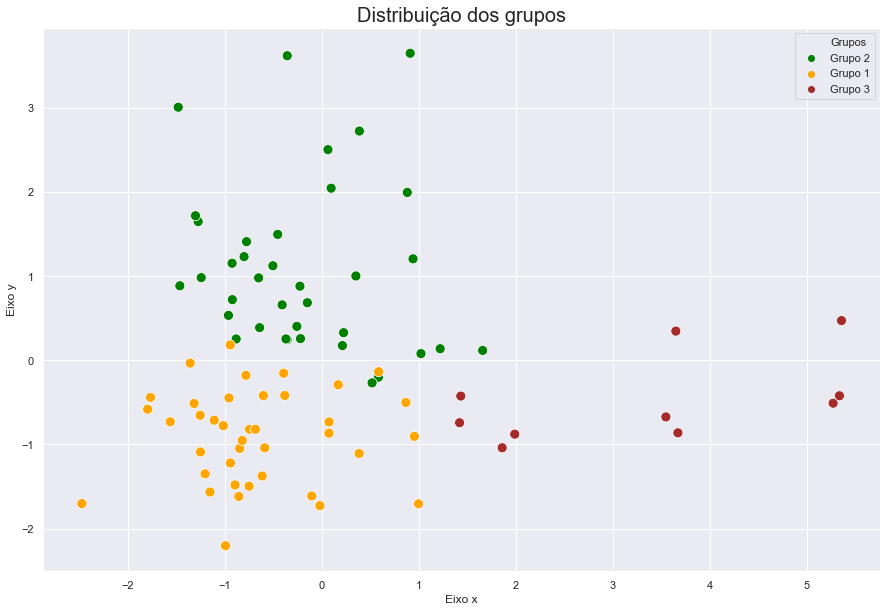

In [54]:
#Usando o PCA para diminuir as dimensionalidades 

pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

results = results.rename(columns={'pca1': 'Eixo x','pca2': 'Eixo y' })

sns.set()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

plt.rcParams['figure.figsize']=(15,10)



sns.scatterplot(x="Eixo x", y="Eixo y", hue=whisky['Grupos'], data=results, marker='o',sizes=(20000, 200000), legend="full", 
                s=100, palette=['green','orange','brown'])
plt.title('Distribuição dos grupos', fontsize=20)

#'dodgerblue','red', 'blue', 'purple', 'pink', 'yellow', 'black'

plt.savefig('ScatterPlot.png', dpi=150, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=1,
        frameon=None, metadata=None);


plt.show()

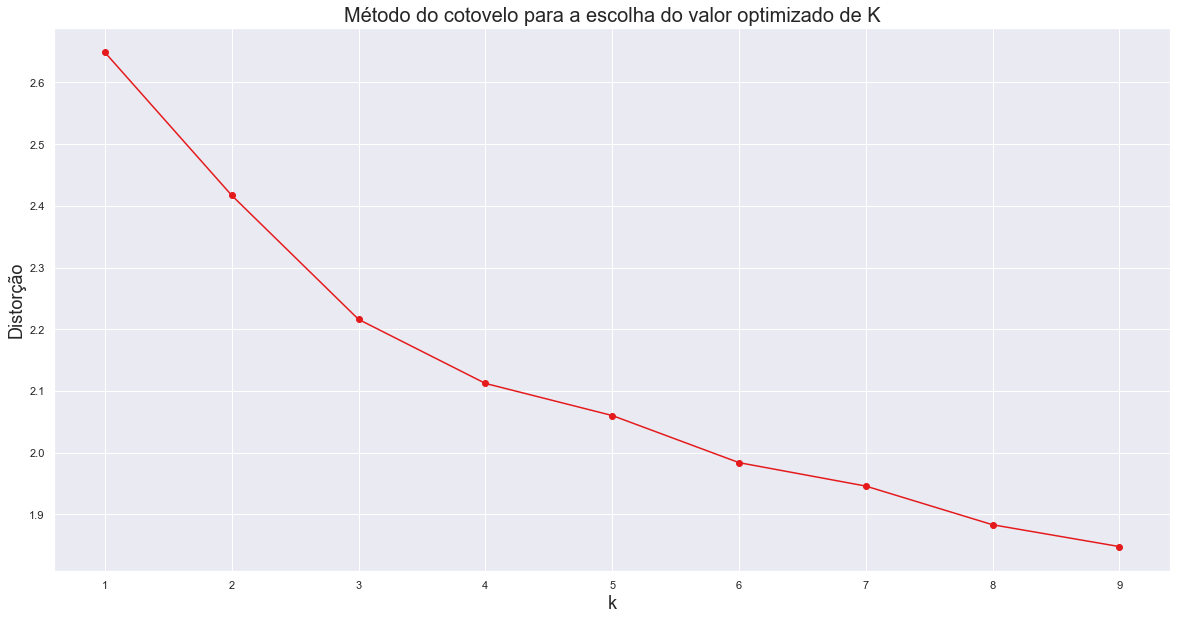

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df.values)
    kmeanModel.fit(df.values)
    distortions.append(sum(np.min(cdist(df.values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.values.shape[0])

palette = plt.get_cmap('Set1')

plt.style.use('seaborn-darkgrid')  

    
# Plot the elbow
plt.plot(K, distortions, 'bx-', marker='o', color=palette(0))
plt.xlabel('k', fontsize=18)
plt.ylabel('Distorção',fontsize=18)
plt.title('Método do cotovelo para a escolha do valor optimizado de K', loc='center', fontsize=20, fontweight=10)
plt.show()

In [56]:
whisky[whisky['Grupos'] == 'Grupo 1'].describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.461538,2.461538,1.128205,0.282051,0.076923,0.923077,1.153846,0.487179,1.102564,1.692308,1.923077,2.076923,299937.538462,807190.076923
std,0.600270,0.755546,0.614709,0.455881,0.269953,0.702799,0.812354,0.601393,0.820618,0.520822,0.739296,0.579683,53118.197214,81230.735496
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,142210.000000,554260.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,273785.000000,792935.000000
50%,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,321180.000000,841760.000000
75%,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,327685.000000,860720.000000
max,2.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,4.000000,381020.000000,885770.000000


In [57]:
whisky[whisky['Grupos'] == 'Grupo 2'].describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01
mean,2.459459,2.324324,1.567568,0.216216,0.054054,1.837838,1.621622,1.621622,1.837838,2.000000,1.810811,1.621622,301796.810811,8.172108e+05
std,0.802586,0.579945,0.602796,0.534121,0.229243,0.646078,0.639068,0.892915,0.727000,0.707107,0.810961,0.828364,57338.811698,7.784963e+04
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,6.209100e+05
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,286580.000000,7.757100e+05
50%,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,322640.000000,8.399200e+05
75%,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,332950.000000,8.486230e+05
max,4.000000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,370860.000000,1.009260e+06


In [58]:
whisky[whisky['Grupos'] == 'Grupo 1'].describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.461538,2.461538,1.128205,0.282051,0.076923,0.923077,1.153846,0.487179,1.102564,1.692308,1.923077,2.076923,299937.538462,807190.076923
std,0.600270,0.755546,0.614709,0.455881,0.269953,0.702799,0.812354,0.601393,0.820618,0.520822,0.739296,0.579683,53118.197214,81230.735496
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,142210.000000,554260.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,273785.000000,792935.000000
50%,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,321180.000000,841760.000000
75%,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,327685.000000,860720.000000
max,2.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,4.000000,381020.000000,885770.000000


Pegando as colunas mais evidentes para a análise

In [59]:
media_body = whisky[whisky['Grupos'] == 'Grupo 1']['Body'].mean()
media_Sweetness = whisky[whisky['Grupos'] == 'Grupo 1']['Sweetness'].mean()
media_Winey = whisky[whisky['Grupos'] == 'Grupo 1']['Winey'].mean()
media_Medicinal = whisky[whisky['Grupos'] == 'Grupo 1']['Medicinal'].mean()
media_Honey = whisky[whisky['Grupos'] == 'Grupo 1']['Honey'].mean()
media_Fruity = whisky[whisky['Grupos'] == 'Grupo 1']['Fruity'].mean()
media_Floral = whisky[whisky['Grupos'] == 'Grupo 1']['Floral'].mean()

df1 = pd.DataFrame({'Body': [media_body]})
df2 = pd.DataFrame({'Sweetness': [media_Sweetness]})
df3 = pd.DataFrame({'Winey': [media_Winey]})
df4 = pd.DataFrame({'Medicinal': [media_Medicinal]})
df5 = pd.DataFrame({'Honey': [media_Honey]})
df6 = pd.DataFrame({'Fruity': [media_Fruity]})
df7 = pd.DataFrame({'Floral': [media_Floral]})

whisky_notas_grupo_1 = pd.concat([df1, df2, df3, df4, df5, df6,df7], axis=1, sort=False)
whisky_notas_grupo_1 = whisky_notas_grupo_1.rename(index={0: ''})
whisky_notas_grupo_1

,Body,Sweetness,Winey,Medicinal,Honey,Fruity,Floral
,1.461538,2.461538,0.487179,0.282051,0.923077,1.923077,2.076923


In [60]:
media_body = whisky[whisky['Grupos'] == 'Grupo 2']['Body'].mean()
media_Sweetness = whisky[whisky['Grupos'] == 'Grupo 2']['Sweetness'].mean()
media_Winey = whisky[whisky['Grupos'] == 'Grupo 2']['Winey'].mean()
media_Medicinal = whisky[whisky['Grupos'] == 'Grupo 2']['Medicinal'].mean()
media_Honey = whisky[whisky['Grupos'] == 'Grupo 2']['Honey'].mean()
media_Fruity = whisky[whisky['Grupos'] == 'Grupo 2']['Fruity'].mean()
media_Floral = whisky[whisky['Grupos'] == 'Grupo 2']['Floral'].mean()

df1 = pd.DataFrame({'Body': [media_body]})
df2 = pd.DataFrame({'Sweetness': [media_Sweetness]})
df3 = pd.DataFrame({'Winey': [media_Winey]})
df4 = pd.DataFrame({'Medicinal': [media_Medicinal]})
df5 = pd.DataFrame({'Honey': [media_Honey]})
df6 = pd.DataFrame({'Fruity': [media_Fruity]})
df7 = pd.DataFrame({'Floral': [media_Floral]})

whisky_notas_grupo_2 = pd.concat([df1, df2, df3, df4, df5, df6,df7], axis=1, sort=False)
whisky_notas_grupo_2 = whisky_notas_grupo_2.rename(index={0: ''})
whisky_notas_grupo_2

,Body,Sweetness,Winey,Medicinal,Honey,Fruity,Floral
,2.459459,2.324324,1.621622,0.216216,1.837838,1.810811,1.621622


In [61]:
media_body = whisky[whisky['Grupos'] == 'Grupo 3']['Body'].mean()
media_Sweetness = whisky[whisky['Grupos'] == 'Grupo 3']['Sweetness'].mean()
media_Winey = whisky[whisky['Grupos'] == 'Grupo 3']['Winey'].mean()
media_Medicinal = whisky[whisky['Grupos'] == 'Grupo 3']['Medicinal'].mean()
media_Honey = whisky[whisky['Grupos'] == 'Grupo 3']['Honey'].mean()
media_Fruity = whisky[whisky['Grupos'] == 'Grupo 3']['Fruity'].mean()
media_Floral = whisky[whisky['Grupos'] == 'Grupo 3']['Floral'].mean()

df1 = pd.DataFrame({'Body': [media_body]})
df2 = pd.DataFrame({'Sweetness': [media_Sweetness]})
df3 = pd.DataFrame({'Winey': [media_Winey]})
df4 = pd.DataFrame({'Medicinal': [media_Medicinal]})
df5 = pd.DataFrame({'Honey': [media_Honey]})
df6 = pd.DataFrame({'Fruity': [media_Fruity]})
df7 = pd.DataFrame({'Floral': [media_Floral]})

whisky_notas_grupo_3 = pd.concat([df1, df2, df3, df4, df5, df6,df7], axis=1, sort=False)
whisky_notas_grupo_3 = whisky_notas_grupo_3.rename(index={0: ''})
whisky_notas_grupo_3

,Body,Sweetness,Winey,Medicinal,Honey,Fruity,Floral
,3.0,1.5,0.5,2.8,0.3,1.3,0.5


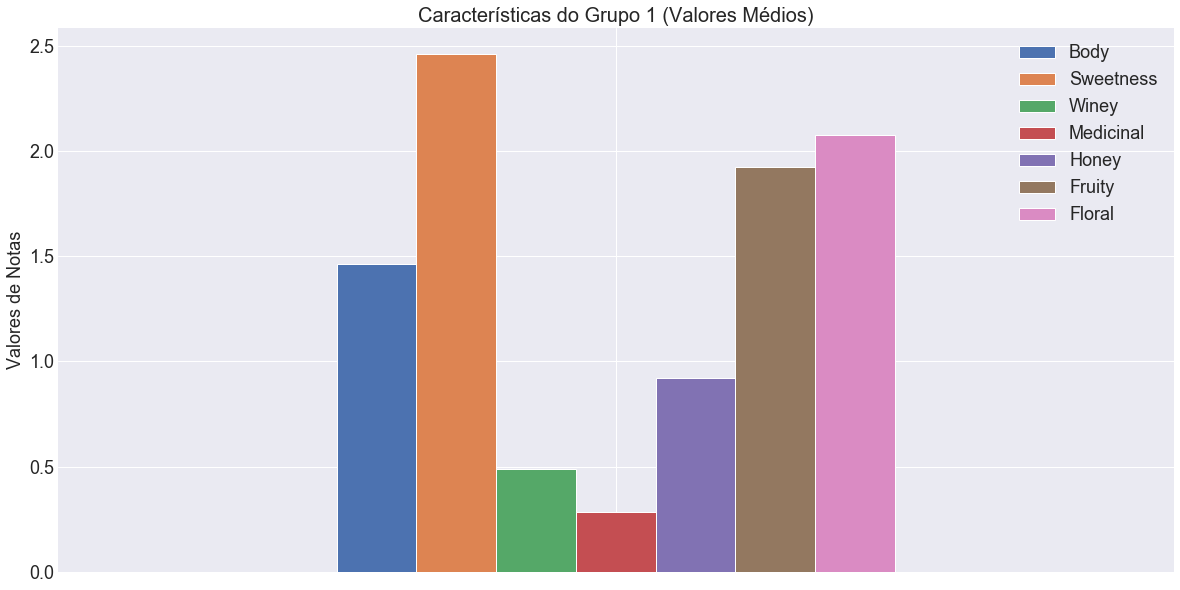

In [62]:
ax = whisky_notas_grupo_1.plot.bar(figsize=(20, 10),rot=0)
ax.set_alpha(0.8)
plt.legend(fontsize=18)


plt.yticks(fontsize=18)


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)


plt.xticks(fontsize=18)

plt.ylabel('Valores de Notas', fontsize=18)
plt.xlabel('', fontsize=18)#
plt.title('Características do Grupo 1 (Valores Médios)', fontsize=20);


plt.savefig('Grupo_1.png', dpi=150, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None);

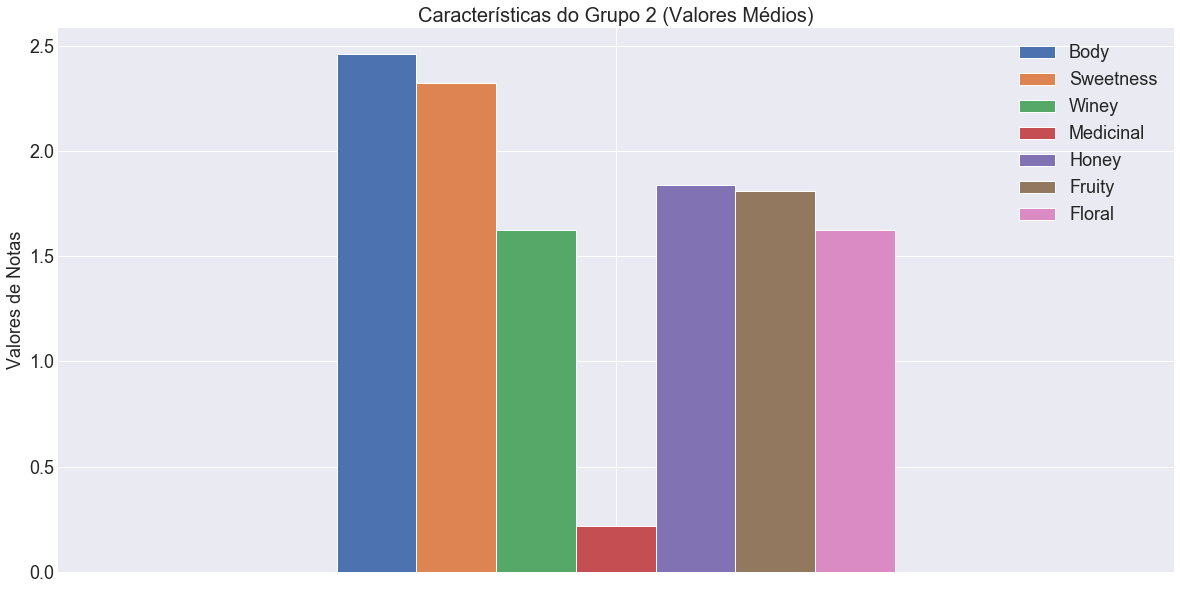

In [63]:
ax = whisky_notas_grupo_2.plot.bar(figsize=(20, 10),rot=0)
ax.set_alpha(0.8)
plt.legend(fontsize=18)


plt.yticks(fontsize=18)


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)


plt.xticks(fontsize=18)

plt.ylabel('Valores de Notas', fontsize=18)
plt.xlabel('', fontsize=18)#
plt.title('Características do Grupo 2 (Valores Médios)', fontsize=20);


plt.savefig('Grupo_2.png', dpi=150, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None);

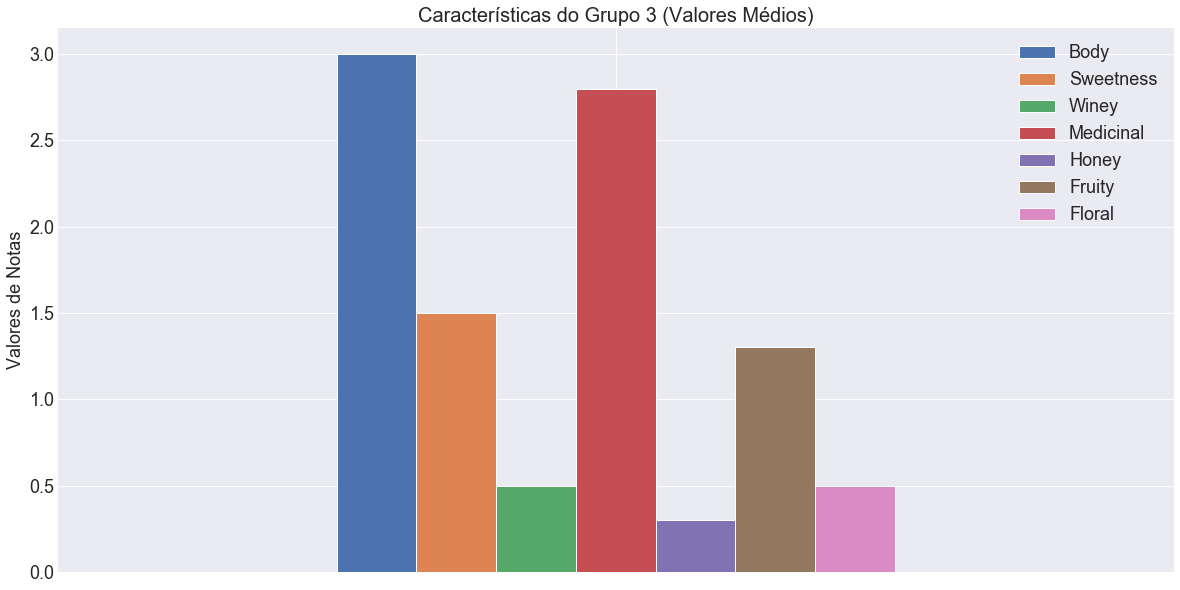

In [64]:
ax = whisky_notas_grupo_3.plot.bar(figsize=(20, 10),rot=0)
ax.set_alpha(0.8)
plt.legend(fontsize=18)


plt.yticks(fontsize=18)


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)


plt.xticks(fontsize=18)

plt.ylabel('Valores de Notas', fontsize=18)
plt.xlabel('', fontsize=18)#
plt.title('Características do Grupo 3 (Valores Médios)', fontsize=20);


plt.savefig('Grupo_3.png', dpi=150, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None);

In [65]:
grupo_1 = (len(whisky[whisky['Grupos'] == 'Grupo 1'])/len(whisky))*100
print('Proporção do grupo 1 é:', grupo_1)

Proporção do grupo 1 é: 45.348837209302324


In [66]:
grupo_2 = (len(whisky[whisky['Grupos'] == 'Grupo 2'])/len(whisky))*100
print('Proporção do grupo 2 é:', grupo_2)

Proporção do grupo 2 é: 43.02325581395349


In [67]:
grupo_3 = (len(whisky[whisky['Grupos'] == 'Grupo 3'])/len(whisky))*100
print('Proporção do grupo 3 é:', grupo_3)

Proporção do grupo 3 é: 11.627906976744185


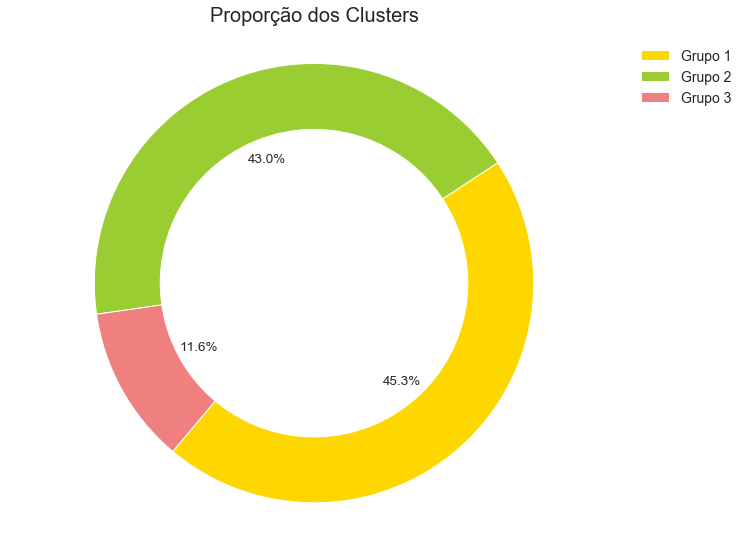

In [68]:
# Gráfico de pizza (donnut) da soma da idenização por região 

# definindo o tamanho do gráfico
fig,ax = plt.subplots(figsize=(11, 9)) 


colors = ['gold', 'yellowgreen', 'lightcoral']
size = [grupo_1,grupo_2,grupo_3]
labels = ['Grupo 1', 'Grupo 2', 'Grupo 3']

# Plot
plt.title('Proporção dos Clusters', size=20, pad=15)
patches, texts, autotexts = ax.pie(size, colors=colors, autopct='%1.1f%%', startangle=230)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for x in autotexts:
  x.set_fontsize(13.5)

for x in texts:
  x.set_fontsize(13.5)

ax.legend(patches, labels,
          loc='upper right',
          fontsize=14,
          bbox_to_anchor=(0.5, 0, 0.7, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# para ignorar avisos

import warnings
warnings.filterwarnings('ignore');

plt.savefig('proporção.png', dpi=150, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None);